In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
from sklearn.model_selection import train_test_split

In [0]:
#os.environ['KAGGLE_USERNAME'] = 'xxx'
#os.environ['KAGGLE_KEY'] = 'xxx'
#!kaggle competitions download -c ieee-fraud-detection

In [3]:
!unzip -o test_identity.csv.zip
!unzip -o test_transaction.csv.zip
!unzip -o train_identity.csv.zip
!unzip -o train_transaction.csv.zip

Archive:  test_identity.csv.zip
  inflating: test_identity.csv       
Archive:  test_transaction.csv.zip
  inflating: test_transaction.csv    
Archive:  train_identity.csv.zip
  inflating: train_identity.csv      
Archive:  train_transaction.csv.zip
  inflating: train_transaction.csv   


In [0]:
train_identity = pd.read_csv('train_identity.csv')
test_identity = pd.read_csv('test_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')
test_transaction = pd.read_csv('test_transaction.csv')

In [0]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [0]:
df = train

In [7]:
df.shape

(590540, 434)

In [8]:
len(df[df["isFraud"]==1])/len(df)*100

3.4990009144173126

In [0]:
columns_def=pd.DataFrame({"na_count":df.isnull().sum().sort_values(ascending=False)})

In [0]:
columns_def["per"]=columns_def["na_count"]/len(df)

In [0]:
range=[0.10, 0.20 ,0.30, 0.40, 0.50, 0.60, 0.70]

In [12]:
for i in range: 
    print (columns_def[columns_def["per"]<i].shape[0]/df.shape[1])

0.25806451612903225
0.41935483870967744
0.46543778801843316
0.46543778801843316
0.5069124423963134
0.5207373271889401
0.5207373271889401


In [0]:
limit=0.20

In [0]:
columns_final=columns_def[columns_def["per"]<limit].index 

df=df[df.columns.intersection(columns_final)]

In [15]:
df[df.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6,P_emaildomain
0,W,discover,credit,NaN
1,W,mastercard,credit,gmail.com
2,W,visa,debit,outlook.com
3,W,mastercard,debit,yahoo.com
4,H,mastercard,credit,gmail.com
5,W,visa,debit,gmail.com
6,W,visa,debit,yahoo.com
7,W,visa,debit,mail.com
8,H,visa,debit,anonymous.com
9,W,mastercard,debit,yahoo.com


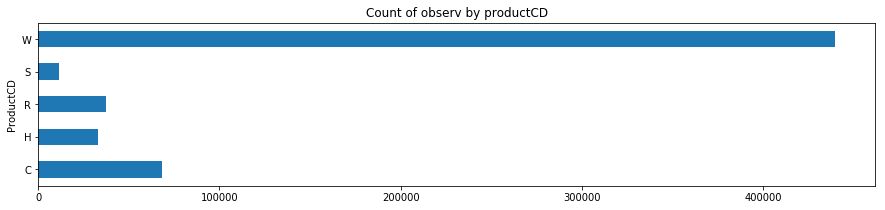

In [16]:
train_transaction.groupby('ProductCD')['TransactionID']\
.count().sort_index().plot(kind='barh'
                           ,figsize=(15,3)
                           ,title='Count of observ by productCD')
plt.show()

In [0]:
card6_dummy_df=pd.get_dummies(df["card6"])

In [18]:
df.shape

(590540, 182)

In [0]:
df=pd.concat([df,card6_dummy_df],axis=1)

In [20]:
df=df._get_numeric_data()
df=df.dropna()

len(df[df["isFraud"]==1])/len(df)*100

2.0285100658469233

In [0]:
x_full_df=df.drop(["isFraud"],axis=1)
y_full_df=df["isFraud"]

In [0]:
X_train,X_test,y_train,y_test=train_test_split(x_full_df,y_full_df,test_size=0.50)

In [23]:
lr = LogisticRegression(solver='lbfgs')  
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
lr.score(X_test, y_test)


0.979509570224918

In [0]:
y_pred=lr.predict(X_test)

In [26]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,207514,35,207549
1,4306,0,4306
All,211820,35,211855
